In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the Inventory dataset

inventory_data = pd.read_excel('F:Inventory Dataset.xlsx')
inventory_df = pd.DataFrame(inventory_data)

# Create the New Inventory dataset
new_inventory_data = pd.read_excel('F:New Inventory.xlsx')

new_inventory_df = pd.DataFrame(new_inventory_data)



In [11]:
# Merge the two datasets on 'Item Number'
merged_df = pd.merge(inventory_df, new_inventory_df, how='outer', on='Item Number')
#merged_df = merged_df.drop_duplicates(subset=['Item Number', 'Date'])
merged_df = merged_df.groupby(['Item Number', 'Date']).agg({'Inventory': 'sum'}).reset_index()

In [12]:
# Pivot the table to get inventory levels at different dates
pivoted_df = merged_df.pivot(index='Item Number', columns='Date', values='Inventory')


In [13]:

# Fill NaN values with 0
pivoted_df = pivoted_df.fillna(0)

# Convert the 'Date' column to datetime type
pivoted_df.columns = pd.to_datetime(pivoted_df.columns)


In [15]:
pivoted_df 

Date,2023-06-17
Item Number,
064-01-0006,10.0
064-01-1346,14770.0
064-01-1347,14244.0
064-01-1348,12112.0
064-01-1349,8144.0
...,...
064-18-9878,2.0
064-18-9884,12419.0
064-18-9909,12.0


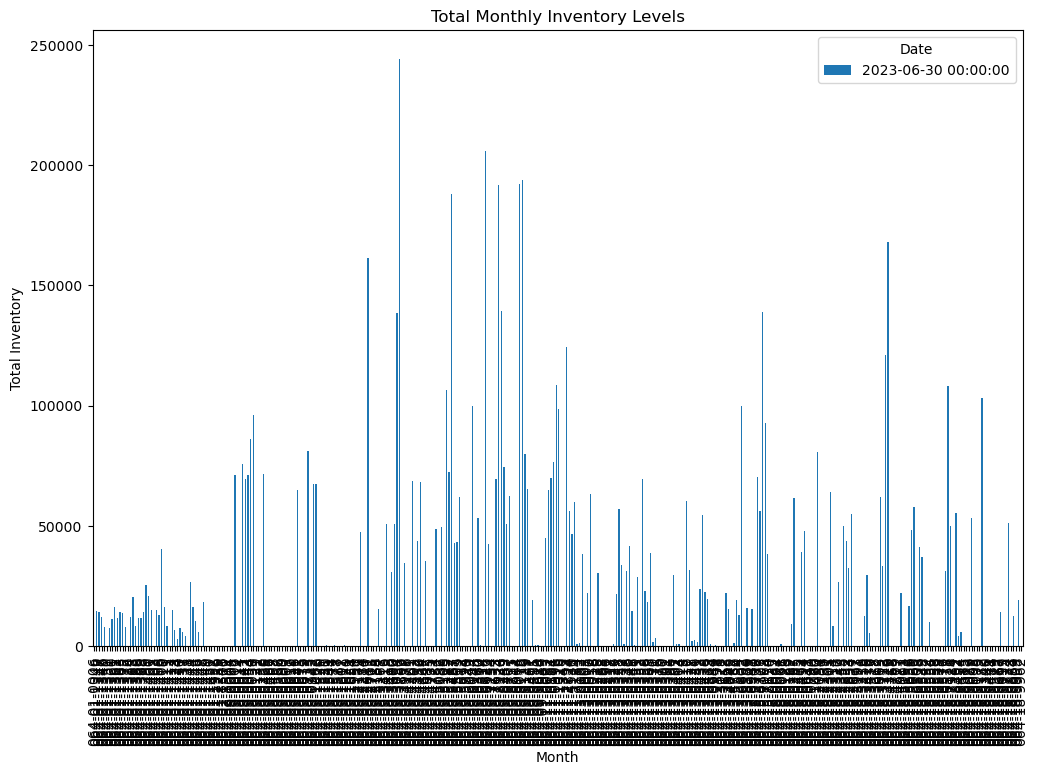

In [14]:
# Convert the 'Date' column to datetime type
pivoted_df_future.columns = pd.to_datetime(pivoted_df_future.columns)

# Display the table showing inventory levels for the next 7 weeks
print(pivoted_df_future)

# Create a bar chart showing total monthly inventory levels
monthly_inventory = pivoted_df_future.resample('M', axis=1).sum()
ax = monthly_inventory.plot(kind='bar', stacked=True, figsize=(15, 12))

# Set x-axis ticks at 1-month intervals
ax.set_xticks(range(0, len(monthly_inventory.columns), 1))

plt.title('Total Monthly Inventory Levels')
plt.xlabel('Month')
plt.ylabel('Total Inventory')
plt.show()

# Create a bar chart showing total monthly inventory levels
monthly_inventory = pivoted_df.resample('M', axis=1).sum()
monthly_inventory.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total Monthly Inventory Levels')
plt.xlabel('Month')
plt.ylabel('Total Inventory')
plt.show()


             2023-06-17  2023-06-24  2023-07-01  2023-07-08  2023-07-15  \
Item Number                                                               
064-01-0006        10.0         0.0         0.0         0.0         0.0   
064-01-1346     14770.0         0.0         0.0         0.0         0.0   
064-01-1347     14244.0         0.0         0.0         0.0         0.0   
064-01-1348     12112.0         0.0         0.0         0.0         0.0   
064-01-1349      8144.0         0.0         0.0         0.0         0.0   
...                 ...         ...         ...         ...         ...   
064-18-9878         2.0         0.0         0.0         0.0         0.0   
064-18-9884     12419.0         0.0         0.0         0.0         0.0   
064-18-9909        12.0         0.0         0.0         0.0         0.0   
064-18-9938     19152.0         0.0         0.0         0.0         0.0   
064-18-9962        19.0         0.0         0.0         0.0         0.0   

             2023-07-22 

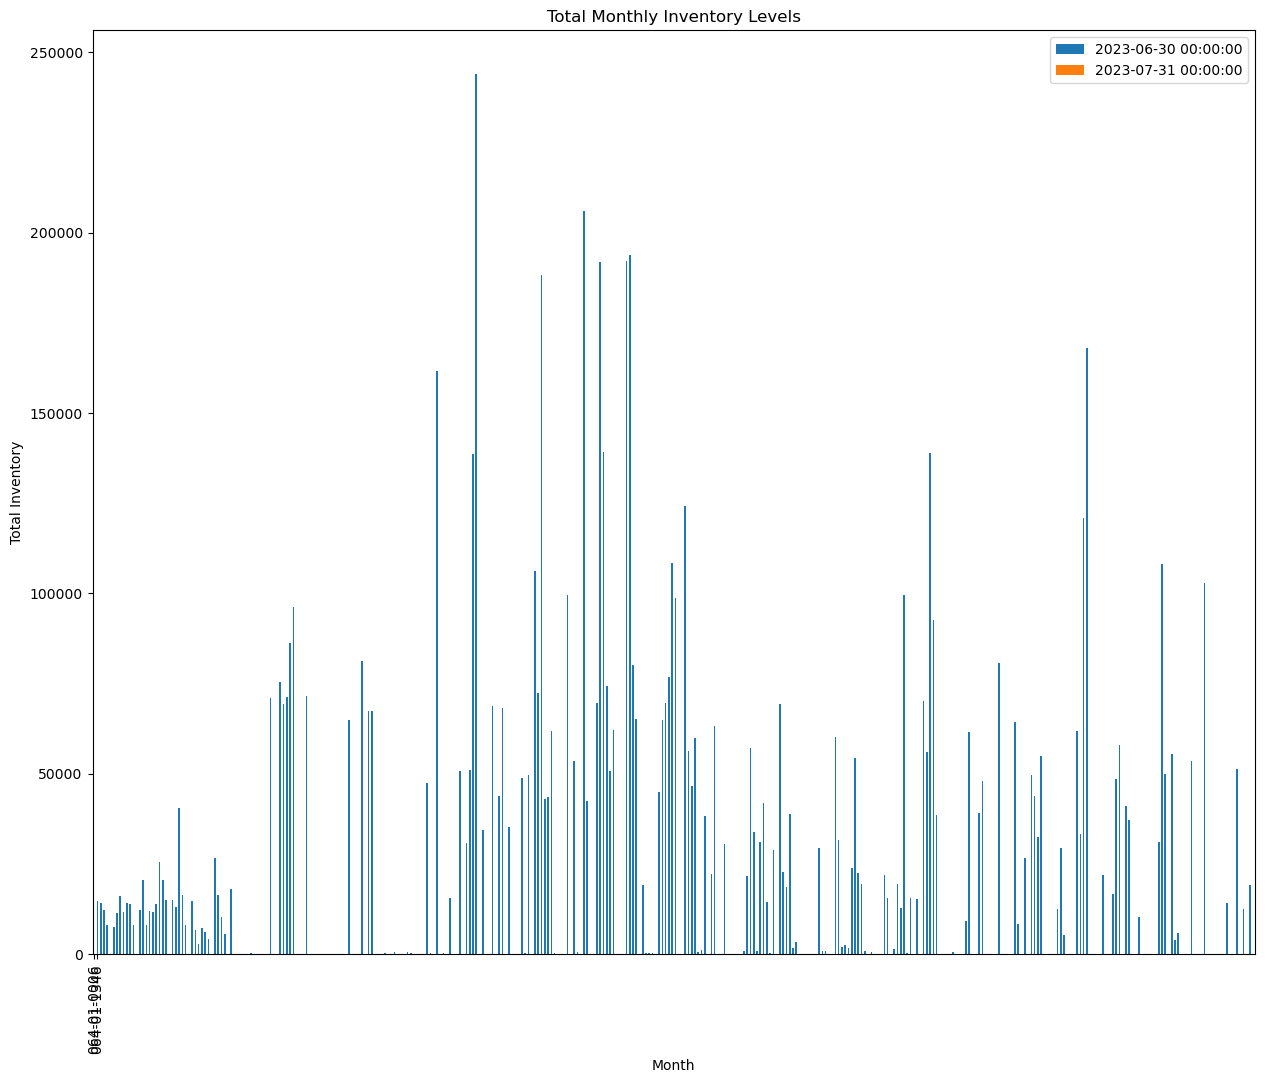

In [17]:

# Extend the date range for the next 7 weeks
future_dates = pd.date_range(start='2023-06-17', periods=7, freq='7D')

# Reindex the DataFrame with the extended date range
pivoted_df_future = pivoted_df.reindex(columns=pivoted_df.columns.union(future_dates))

# Fill NaN values with 0
pivoted_df_future = pivoted_df_future.fillna(0)

# Convert the 'Date' column to datetime type
pivoted_df_future.columns = pd.to_datetime(pivoted_df_future.columns)

# Display the table showing inventory levels for the next 7 weeks
print(pivoted_df_future)

# Create a bar chart showing total monthly inventory levels
monthly_inventory = pivoted_df_future.resample('M', axis=1).sum()
ax = monthly_inventory.plot(kind='bar', stacked=True, figsize=(15, 12))

# Set x-axis ticks at 1-month intervals
ax.set_xticks(range(0, len(monthly_inventory.columns), 1))

plt.title('Total Monthly Inventory Levels')
plt.xlabel('Month')
plt.ylabel('Total Inventory')
plt.show()
